In [456]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

In [457]:
def model_predictions(x, X_train, X_test, y_train, y_test):
    #global X_train, X_test, y_train, y_test, model, predictions
    if x == "linear":
        model =LinearRegression()    # model
        model.fit(X_train, y_train) # model train
        print("Linear:")
        predictions=model.predict(X_test)   # model prediction
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    elif x == "knn":
        model = KNeighborsRegressor(n_neighbors = 10)
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    elif x=="random forest":
        model = RandomForestRegressor(n_estimators = 100, random_state = 0) 
        model.fit(X_train, y_train)
        print("Random Forest Regressor:")
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(r2)
        rmse = mean_squared_error(y_test, predictions)**0.5
        print(rmse)
    else:
        print ("Input should be linear, random forest, or knn")   
    return [model, predictions]

### Import preprocessed data

In [458]:
data = pd.read_csv('data_reg_preprocessed.csv')

In [459]:
data

prov_code  ethnic_kurdish  ln_gdppc_cons  divorce_rate_ma5  mosques_perk  \
0     0.030402        0.406505       0.127318          0.044326      0.018443   
1     0.030389        0.406334       0.129779          0.046557      0.018230   
2     0.030379        0.406200       0.130956          0.049579      0.019466   
3     0.027410        0.366494       0.119252          0.046926      0.017867   
4     0.027404        0.366422       0.120006          0.049054      0.017931   
..         ...             ...            ...               ...           ...   
422   0.593529        0.091594       0.033239          0.010654      0.013883   
423   0.593516        0.091592       0.033649          0.011519      0.013787   
424   0.593497        0.091589       0.034293          0.012676      0.013602   
425   0.593495        0.091589       0.034107          0.013555      0.013433   
426   0.647802        0.099970       0.037464          0.014572      0.014508   

     fm_diff_educ  pol_attitude   count_k  
0       -0.001912     -0.902945  0.959129  
1       -0.002072     -0.902564  0.711303  
2       -0.002038     -0.902268  0.423403  
3       -0.001829     -0.920970  0.325693  
4       -0.001840     -0.920788  0.646474  
..            ...           ...       ...  
422     -0.000767     -0.798700  0.568975  
423     -0.000758     -0.798682  0.562510  
424     -0.000753     -0.798656  0.554957  
425     -0.000703     -0.798654  0.809999  
426     -0.000753     -0.754010  0.529647  

[427 rows x 8 columns]

In [460]:
list_titles = data.columns.values

*Assign final column as y and remaining columns as X features*

In [461]:
y = pd.DataFrame(data[data.columns[-1]])
X = data.drop([data.columns[-1]],axis=1)

In [462]:
X = X.drop('prov_code', axis=1)

*Split into train/test data*

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [464]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 count_k 
0.067832    1
0.496744    1
0.461539    1
0.463335    1
0.468029    1
           ..
0.286992    1
0.292168    1
0.292273    1
0.294135    1
1.248117    1
Length: 171, dtype: int64
y_train:
 count_k 
0.074568    1
0.086781    1
0.462684    1
0.468051    1
0.468792    1
           ..
0.293122    1
0.293389    1
0.293884    1
0.293946    1
1.319331    1
Length: 256, dtype: int64


Choose Model

In [465]:
#Logistic Regression: "logistic", K Nearest Neighbours: "knn", Decision Tree: "decision_tree", Random Forest: "random_forest"
model_run = model_predictions('linear', X_train, X_test, y_train, y_test)

Linear:
0.037184226334838755
0.2130947401601473


Feature: 0, Score: 0.15530
Feature: 1, Score: -5.56757
Feature: 2, Score: 12.43741
Feature: 3, Score: 3.26725
Feature: 4, Score: -3.20181
Feature: 5, Score: 0.03397


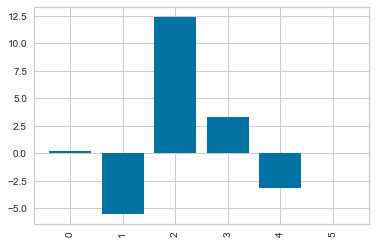

In [466]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

# CLUSTERING
Since nothing can be predicted. We will work with clustering.

In [467]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(data)

# print the cluster centers
clusters_coordinates = kmeans.cluster_centers_

print(clusters)

[6 6 0 0 6 6 6 1 0 0 0 0 2 2 2 2 2 6 0 0 3 3 0 2 6 2 2 2 6 2 2 2 2 2 2 5 5
 1 5 6 2 6 6 1 6 1 5 1 1 1 1 1 1 2 6 2 2 2 6 6 6 6 6 1 0 0 0 3 2 2 2 2 6 6
 1 2 1 1 5 1 6 2 2 2 2 2 2 6 1 1 5 5 6 6 6 6 2 2 2 6 6 6 6 2 2 6 2 2 2 2 6
 3 3 3 3 3 3 3 3 1 5 1 1 1 1 1 6 0 6 0 0 6 0 6 6 6 6 6 2 2 2 6 2 2 1 5 5 1
 5 1 5 6 6 2 6 6 6 6 6 1 5 1 5 2 6 2 2 2 5 1 5 5 4 4 7 2 1 1 5 4 4 7 4 5 2
 2 2 2 2 2 2 5 0 0 0 3 3 3 7 4 7 2 2 2 2 7 2 2 2 2 2 2 2 6 5 5 1 5 7 2 2 2
 2 2 2 2 2 6 6 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 4 6 0 0 2 2 6 2 4 4 4 4 4 7 4
 7 2 6 2 2 2 2 2 0 0 0 0 0 1 5 5 5 1 1 1 5 0 7 7 2 2 7 2 5 5 5 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 5 5 2 2 2 2 5 5 1 5 5 5 5 5 7 2 2 2
 7 2 2 2 7 7 2 3 3 3 3 0 0 0 0 0 4 4 4 7 7 4 7 3 3 3 3 3 3 3 2 2 7 2 5 1 5
 1 5 1 7 2 7 7 7 2 7 7 7 7 7 7 7 4 4 4 3 3 3 3 3 3 3 3 4 4 7 7 3 3 3 3 5 5
 5 1 1 5 4 7 4 4 4 4 4 4 4 7 4 7 7 7 7 7]


Text(0, 0.5, 'inertia')

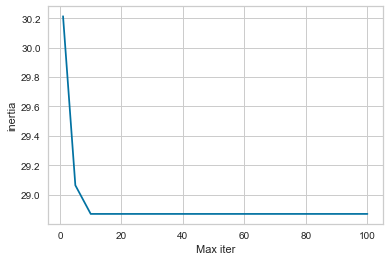

In [468]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(data)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

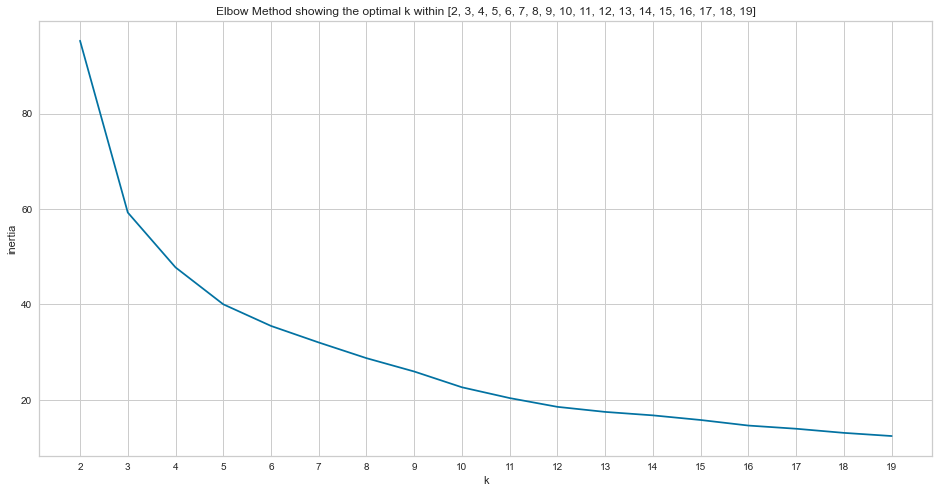

In [469]:
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

In [ ]:
K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(data)
    silhouettes.append(silhouette_score(data,
                                     kmeans.predict(data)
                                    )
                   )
    


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [5,6, 7,8]:
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-4][mod])
    visualizer.fit(data)

8 looks gr8. We will stick with that

In [ ]:
kmeans = KMeans(n_clusters=8,
               random_state=1234)
kmeans.fit(data)

clusters = kmeans.predict(data)

In [ ]:
clusters.shape

In [ ]:
reg_clustered = pd.DataFrame(data, columns = list_titles)

In [ ]:
reg_clustered ['cluster_id'] = clusters

In [ ]:
reg_clustered

In [ ]:
#cluster_centers_df['cluster_id'] = range(0,8)

In [ ]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_)

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(cluster_centers_df, cmap="PiYG", annot=True, center=0)
plt.show()

In [ ]:
reg_sub_df =reg_clustered[['pol_attitude', 'count_k','cluster_id']]

In [ ]:
# plot datapoints
sns.scatterplot(data=reg_sub_df,
               x="pol_attitude",
               y="count_k",
               hue='cluster_id')